In [1]:
import pandas as pd
import os
import numpy as np
import nltk
import re
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

Using TensorFlow backend.
/Users/test/opt/anaconda3/envs/ML_RESEARCH/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/test/opt/anaconda3/envs/ML_RESEARCH/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/test/opt/anaconda3/envs/ML_RESEARCH/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
print (os.getcwd())
base_dir=os.getcwd()

/Users/test/Documents/twimbit


In [3]:
df=pd.read_csv('./final_datset.csv')

In [4]:

df.dropna()


,Unnamed: 0,q,context,distance,target
0,0,Understand the virtual banking landscape of So...,\n\t\tThe page provides the exchange rate of 1...,0.895966,invalid
1,1,crisis in a corporate perspective. I needed t...,Convert currency 18064 KRW to USD. How much is...,0.666667,invalid
2,2,What is webank china? I need to understand the...,\nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...,0.519231,invalid
3,3,What is mybank china? I need to understand the...,\n\t ₩18064.00 = $14.91\t\t \t\t\t\t\t,0.666667,invalid
5,5,Understand the virtual banking landscape of So...,\n\t\tThe page provides the exchange rate of 1...,0.895966,invalid
...,...,...,...,...,...
2079,2079,What is mybank china? I need to understand the...,"Two non-financial services entities, Korea Fed...",0.874332,invalid
2080,2080,What is mybank china? I need to understand the...,"With its shareholding structure reshuffled, To...",0.922942,invalid
2081,2081,What is mybank china? I need to understand the...,Analysts say that Toss Bank has a better chanc...,0.888889,invalid
2082,2082,What is mybank china? I need to understand the...,"At the same time, Toss Bank doesn't have much ...",0.891429,invalid


In [5]:
#df.drop_duplicates(subset=['q'],inplace=True)  #dropping duplicates
print(df['context'])
df.dropna(axis=0,inplace=True)   #dropping na

0       \n\t\tThe page provides the exchange rate of 1...
1       Convert currency 18064 KRW to USD. How much is...
2       \nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...
3        \n\t        ₩18064.00 = $14.91\t\t    \t\t\t\t\t
4       \n\n\t\t        Inverse: 18064.00 USD = 218899...
                              ...                        
2079    Two non-financial services entities, Korea Fed...
2080    With its shareholding structure reshuffled, To...
2081    Analysts say that Toss Bank has a better chanc...
2082    At the same time, Toss Bank doesn't have much ...
2083    Sign up for our email newsletter and keep up t...
Name: context, Length: 2084, dtype: object


In [6]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [7]:
df['context'][:10]

0     \n\t\tThe page provides the exchange rate of 1...
1     Convert currency 18064 KRW to USD. How much is...
2     \nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...
3      \n\t        ₩18064.00 = $14.91\t\t    \t\t\t\t\t
5     \n\t\tThe page provides the exchange rate of 1...
6     Convert currency 18064 KRW to USD. How much is...
7     \nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...
8      \n\t        ₩18064.00 = $14.91\t\t    \t\t\t\t\t
9     \n\n\t\t        Inverse: 18064.00 USD = 218899...
10    18064 South Korean Won to US Dollar, convert 1...
Name: context, dtype: object

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
   # newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df['q']:
    cleaned_text.append(text_cleaner(t))

[nltk_data] Downloading package stopwords to /Users/test/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df['context'][:10]

0     \n\t\tThe page provides the exchange rate of 1...
1     Convert currency 18064 KRW to USD. How much is...
2     \nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...
3      \n\t        ₩18064.00 = $14.91\t\t    \t\t\t\t\t
5     \n\t\tThe page provides the exchange rate of 1...
6     Convert currency 18064 KRW to USD. How much is...
7     \nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...
8      \n\t        ₩18064.00 = $14.91\t\t    \t\t\t\t\t
9     \n\n\t\t        Inverse: 18064.00 USD = 218899...
10    18064 South Korean Won to US Dollar, convert 1...
Name: context, dtype: object

In [10]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
            #print(newString)
    return newString

In [11]:
#Call the above function
cleaned_summary = []
for t in df['context']:
    cleaned_summary.append(summary_cleaner(t))

df['cleaned_text']=cleaned_text
df['cleaned_summary']=cleaned_summary
df['cleaned_summary'].replace('', np.nan, inplace=True)
#df.dropna(axis=0,inplace=True)

In [12]:
df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x : '_START_ '+ str(x) + ' _END_')

In [13]:
print(df['cleaned_text'])

0       understand virtual banking landscape south kor...
1       crisis corporate perspective needed know actio...
2       webank china need understand founders bank amo...
3       mybank china need understand founders bank amo...
5       understand virtual banking landscape south kor...
                              ...                        
2079    mybank china need understand founders bank amo...
2080    mybank china need understand founders bank amo...
2081    mybank china need understand founders bank amo...
2082    mybank china need understand founders bank amo...
2083    mybank china need understand founders bank amo...
Name: cleaned_text, Length: 2022, dtype: object


In [14]:


X1=[]
X2=[]
Y=[]
for i in range(len(df['cleaned_text'])):
    try:
        print(i)
        print("\n")
        print("Reviews:",df['cleaned_text'][i])
        X1.append(df['cleaned_text'][i])
        print("Summary:",df['cleaned_summary'][i])
        X2.append(df['cleaned_summary'][i])
        print("Summary:",df['target'][i])
        Y.append(df['target'][i])
        print("\n")
    except:
        pass

0


Reviews: understand virtual banking landscape south korea number virtual banks south korea two virtual banks well known kakao bank bank growth two banks many customers bank banks earning profits fsc measures virtual banks south korea toss getting virtual banking license
Summary: _START_ the page provides the exchange rate of south korean won krw to us dollar usd sale and conversion rate moreover we added the list of the most popular conversions for visualization and the history table with exchange rate diagram for south korean won krw to us dollar usd from saturday till saturday latest update of south korean won krw exchange rate reversed rate us dollar usd to south korean won krw  _END_
Summary: invalid


1


Reviews: crisis corporate perspective needed know actions decisions quick measures companies around globe taking order protect financial crisis cover kinds industry examples include aviation hospitality commerce banks insurance healthcare wellness etc meanwhile want find affe


215


Reviews: understand virtual banking landscape south korea number virtual banks south korea two virtual banks well known kakao bank bank growth two banks many customers bank banks earning profits fsc measures virtual banks south korea toss getting virtual banking license
Summary: _START_ south korea doosan heavy industries amp construction co once unrivalled in nuclear reactor equipment provider is struggling  _END_
Summary: invalid


216


Reviews: understand virtual banking landscape south korea number virtual banks south korea two virtual banks well known kakao bank bank growth two banks many customers bank banks earning profits fsc measures virtual banks south korea toss getting virtual banking license
Summary: _START_ bok mulls emergency rate cut next week amid panicky sell korea  _END_
Summary: invalid


217


Reviews: understand virtual banking landscape south korea number virtual banks south korea two virtual banks well known kakao bank bank growth two banks many customer



384


Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ please consider using different web browser for better experience  _END_
Summary: invalid


385


Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ photo via shutterstock  _END_
Summary: valid


386


Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years nu

Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ jingyou and weltmeister will reportedly provide their extensive data in insurance and vehicle models respectively meanwhile webank will develop the blockchain based information sharing system and jd com will explore applications  _END_
Summary: invalid


559


Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ su xiaokang head of blockchain at webank said the release of the first blockchain automobile da

728


Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ korea bizwire is committed to reporting on uniquely korean stories for our readers but we also provide enhanced coverage of useful information from all over the world if we find them of interest or relevance to our global audience  _END_
Summary: invalid


729


Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ kobiz media the parent company of this site offers highly competent press release distr

Summary: invalid


898


Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ doosan heavy faced with worst crisis from govt phase out policy  _END_
Summary: invalid


899


Reviews: webank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ south korea doosan heavy industries amp construction co once unrivalled in nuclear reactor equipment provider is struggling  _END_
Summary: invalid


900


Reviews: webank china need understand founders bank amount stake strategic inte

Summary: _START_ the star market overview  _END_
Summary: valid


1068


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ equalocean is an international information service provider and investment research firm that aims to become global platform for industrial innovation  _END_
Summary: invalid


1069


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ we strive to make technology inclusive accessible and transparent  _END_
Summary: invalid


1070




Summary: _START_ amfi writes to rbi on yes bank at bonds tries to negotiate on behalf of mfs  _END_
Summary: invalid


1240


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ franklin mf marks down reliance adag essel group debt navs of schemes plummet  _END_
Summary: invalid


1241


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ market fall drags sip aum to rs lakh crore in feb from rs lakh crore month ago  _END_
Summary: invalid


1242


Reviews

Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ webank innovative lending product added powerful financial solution to tencent payment service portfolio enabling it to become one of the strongest players in the chinese financial services market even by china standards webank growth has been incredibly rapid far outpacing the performance of traditional banks today the digital bank profitably serves more than million previously underserved customers and processes more than million transactions per day  _END_
Summary: invalid


1410


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three

Summary: _START_ reproduction in whole or in part in any form or medium without express written permission of coinspeaker ltd is prohibited  _END_
Summary: invalid


1599


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ on friday tencent initiated weizhong bank or webank and jingyou technology announced that they will build blockchain powered automobile database the news was announced at jingyou insurance technology conference and will likely be used for claims and car servicing  _END_
Summary: invalid


1600


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number custom

Summary: _START_ one of the biggest merits of kakao bank is its price competitiveness its overseas wire transfer fee is percent of that charged by traditional banks it also boasts low lending interest rates compared with those of other off line banks with its lowest credit loan rate coming in at percent  _END_
Summary: invalid


1753


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ the price edge comes from the low costs inherent to internet banks which benefit from low operating expenses due to lack of physical branches and face to face interaction with clients  _END_
Summary: invalid


1754


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised

1923


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ from my perspective there is very little favour for digital banks in terms of regulatory requirements kim remarks  _END_
Summary: invalid


1924


Reviews: mybank china need understand founders bank amount stake strategic intent bank established much capital bank raised till date company financials percentage revenue grown last three years number customers serve bifurcation customer segment revenue generated technology proposition technologies use
Summary: _START_ kakao whose largest shareholder is korea investment amp securities is one of only two digital banks in the country  _END_
Summary: invalid


1925


Reviews: mybank china need understand founders bank am

In [15]:
max_len_text=80 
max_len_summary=10

In [16]:
print(len(X1))#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(X1))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(X1) 
x_tr1   =   x_tokenizer.texts_to_sequences(X2)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_tr1   =   pad_sequences(x_tr1, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1



1962


In [17]:
Y

['invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'valid',
 'valid',
 'valid',
 'valid',
 'invalid',
 'valid',
 'valid',
 'valid',
 'invalid',
 'valid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'valid',
 'invalid',
 'valid',
 'valid',
 'valid',
 'valid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'valid',
 'valid',
 'valid',
 'valid',
 'valid',
 'valid',
 'valid',
 'invalid',
 'valid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'valid',
 'invalid',
 'valid',
 'valid',
 'valid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'invalid',
 'valid',
 'invalid',
 'invalid',
 'invali

In [18]:
from keras.utils import to_categorical

# one hot encode
encoded = to_categorical(x_tr)
# one hot encode
encoded1 = to_categorical(x_tr1)
print(encoded)
print(encoded1)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0

In [19]:
# one hot encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
label = onehot_encoder.fit_transform(integer_encoded)


[0 0 0 ... 0 0 0]


In [20]:
print("shape x_tr",len(x_tr))
print("shape x_tr1",len(x_tr1))


shape x_tr 1962
shape x_tr1 1962


In [21]:
label.shape

(1962, 2)

print("Target shape",y.shape)
print("Idea shape",X1.shape)
print("Context shape",X2.shape)

In [22]:
print("Context Encoding",encoded.shape)
print("Context Encoding",encoded1.shape)

Context Encoding (1962, 80, 100)
Context Encoding (1962, 80, 99)


In [23]:
x_tr=np.transpose(encoded)
x_tr1=np.transpose(encoded1)
print("Context Encoding",x_tr.shape)
print("Context Encoding",x_tr1.shape)

Context Encoding (100, 80, 1962)
Context Encoding (99, 80, 1962)


In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequential

In [25]:
vocab_size=500


In [26]:
print(label.shape)

(1962, 2)


In [27]:
x1 = Input(shape=(80,100,))
x2 = Input(shape=(80,99,))

In [28]:
print(x1)

Tensor("input_1:0", shape=(?, 80, 100), dtype=float32)


In [29]:
embed1=keras.layers.Embedding(vocab_size,1400 , embeddings_initializer='uniform', embeddings_regularizer=None)(x1)
dense1 = keras.layers.Flatten()(embed1)
embed2=keras.layers.Embedding(vocab_size,1400 , embeddings_initializer='uniform', embeddings_regularizer=None)(x2)
dense2 = keras.layers.Flatten()(embed2)

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
merged_vector = keras.layers.concatenate([dense1, dense2],axis=-1)
#weights = merged_vector.weights()

In [31]:
predictions = Dense(2, activation='softmax')(merged_vector)


In [32]:
model = Model(inputs=[x1, x2], outputs=predictions)

In [33]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 100)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 80, 99)       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 80, 100, 1400 700000      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 80, 99, 1400) 700000      input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 

In [34]:
x_tr=encoded[:96]
#label=np.array(label)
#label=np.transpose(label)

In [35]:

history=model.fit([encoded,encoded1],label ,validation_split=0.24, epochs=2)

Instructions for updating:
Use tf.cast instead.
Train on 1491 samples, validate on 471 samples
Epoch 1/2
1491/1491 [==============================] - 525s 352ms/step - loss: 3.7661 - acc: 0.7525 - val_loss: 4.9963 - val_acc: 0.6900
Epoch 2/2
1491/1491 [==============================] - 556s 373ms/step - loss: 3.8593 - acc: 0.7606 - val_loss: 4.9963 - val_acc: 0.6900


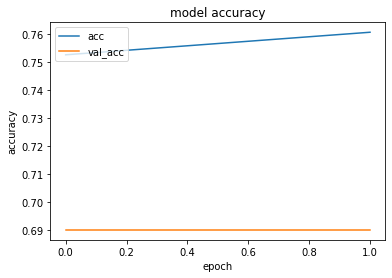

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [37]:
model.save('model_validation.h5')

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
y=o
xx1=s

In [ ]:
xx2=s8